In [1]:
'''import package'''
import numpy as np 
import matplotlib.pyplot as pt
from matplotlib.pyplot import style
style.use('ggplot')
import scipy.optimize as lm
import random as r
r.seed(2020)

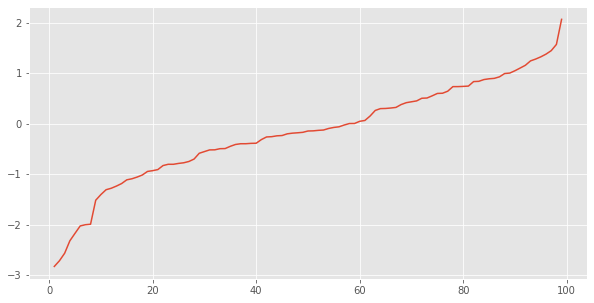

In [15]:
x = np.array(range(1,100))
y = np.random.normal(size=len(x))
y = np.sort(y)
pt.figure(figsize=(10,5))
pt.plot(x,y)

In [16]:
line = lambda p1 , p2 , x : p1 + p2 * x[:]
exp = lambda p1 , p2 , x : p1 * np.exp( p2*x[:] )
logit = lambda p1 , p2 , x : np.exp(p1 + x[:]*p2) / (1 + np.exp(p1 + x[:]*p2) )

# logit = lambda  p , x : p / ( 1 + ( ( - p)/ p) * np.exp(-p*x[:] ) )

In [50]:
class error :
    def mline(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-line(p1,p2,x),2))  
    
    def mexp(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-exp(p1,p2,x),2))
    
    def mlogit(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-logit(p1,p2,x),2))
#         return np.sum( (y-logit(p1,p2,x)) * x )

In [51]:
b = error()
p = [0,0]
b.mline(p,x,y)

100.70581917576766

(-0.05288502851804699, 0.0066930698249654036)

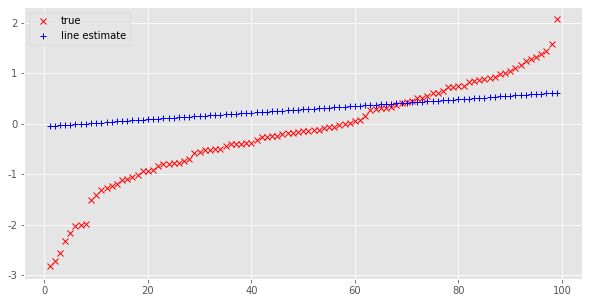

In [52]:
e = error()
p = [0,0]
params_line = lm.least_squares(e.mline,p,args=(x,y)).x
p1 , p2 = params_line
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , line(p1,p2,x),'b+' , label = 'line estimate')
pt.legend()

p1 , p2

(-0.9492175581178504, -0.0340529342511561)

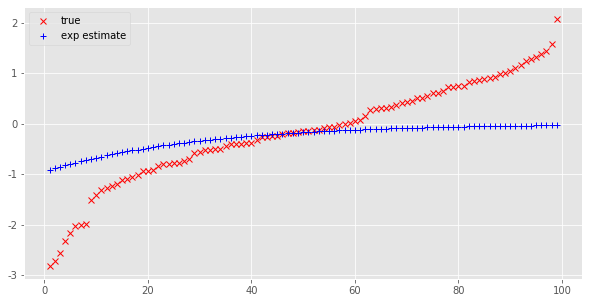

In [53]:
e = error()
p = [0,0]
params_line = lm.least_squares(e.mexp,p,args=(x,y)).x
p1 , p2 = params_line
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , exp(p1,p2,x),'b+' , label = 'exp estimate')
pt.legend()

p1 , p2

[0, 0]

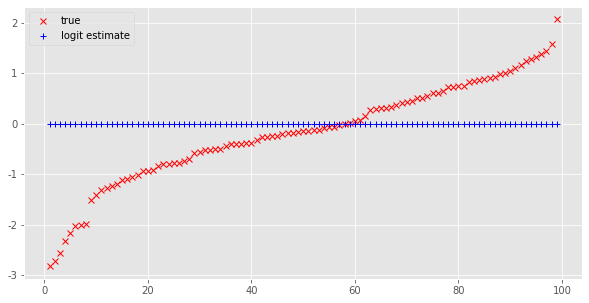

In [54]:
e = error()
p = [0,0]

params = lm.least_squares(e.mlogit,p,args=(x,y)).x
p1 , p2= params
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , logit(p1,p2,x),'b+' , label = 'logit estimate')
pt.legend()

p

In [22]:
import akshare as ak

df = ak.covid_19_163(indicator='中国历史累计数据').confirm

In [34]:
df.index = range(len(df))

time = df.index

[0.0, 0.0]

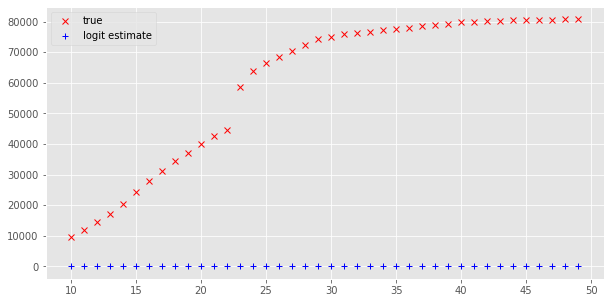

In [60]:
e = error()
p = [0.0,0.0]
t = time
d = df
params = lm.least_squares(e.mlogit,p,args=(t,d)).x
p1 , p2 = params
pt.figure(figsize=(10,5))
pt.plot(t , d , 'rx' , label = 'true')
pt.plot(t , logit(p1,p2,t),'b+' , label = 'logit estimate')
pt.legend()

p

In [66]:
xx = np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
yy = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

[0.0, 0.0]

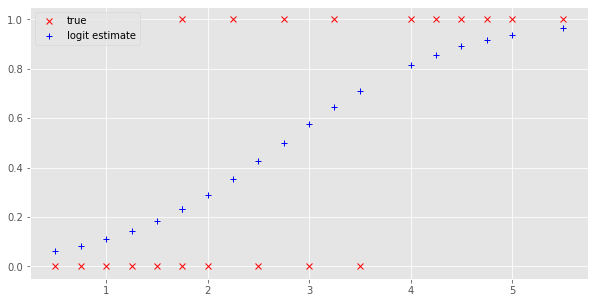

In [67]:
# example is ok ...
e = error()
p = [0.0,0.0]
params = lm.least_squares(e.mlogit,p,args=(xx,yy)).x
p1 , p2 = params
pt.figure(figsize=(10,5))
pt.plot(xx , yy , 'rx' , label = 'true')
pt.plot(xx , logit(p1,p2,xx),'b+' , label = 'logit estimate')
pt.legend()

p